# Calculate restframe SED of individual Diffstar galaxy

This notebook provides example usage of the `skysim_calc_sed.py` module that calculates the restframe SED of galaxies in the SkySim5000 catalog. You will need `jax`, `diffmah`, `diffstar`, `dsps` installed in your environment.

### Load spectra of simple stellar populations

The `load_ssp_spectra` function returns a few arrays that define the SSP spectra. All this function does is read these arrays from disk and return them as a namedtuple. These arrays should be considered part of the SkySim5000 data product and can be retrieved with the same reader used to load the catalog itself.

In [1]:
from load_sps_data import load_ssp_spectra

DSPS_DRN = "/Users/aphearin/work/DATA/DSPS_data"
ssp_data = load_ssp_spectra(DSPS_DRN)

### Load model parameters defining the assembly history of the galaxy

Below we'll just define some typical parameters for an example galaxy. But the `get_galaxy_params` function can retrieve these arrays from the SkySim5000 data table.

In [2]:
logm0, lgtc, early, late = 13.0, 0.25, 1.5, 1.0
default_mah_params = np.array((logm0, lgtc, early, late))
default_u_ms_params = np.array([11.41, -1.54724, -3.63073, -0.767132, 13.0765])
default_u_q_params = np.array([1.83313, -0.11951, -1.95095, -0.687856])

### Calculate restframe SED

In [3]:
from skysim_calc_sed import _calc_rest_sed_single_diffstar_gal

t_obs = 8.0

sed_args = (t_obs,
    ssp_data.lgZsun_bin_mids,
    ssp_data.log_age_gyr,
    ssp_data.ssp_spectra,
    default_mah_params,
    default_u_ms_params, 
    default_u_q_params)

rest_sed, galaxy_data = _calc_rest_sed_single_diffstar_gal(*sed_args)

### Inspect the results

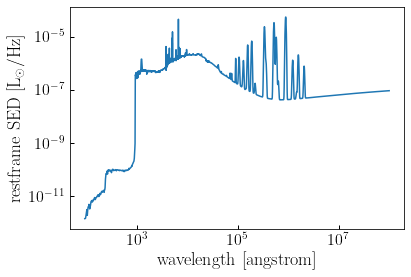

In [4]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()
__=ax.plot(ssp_data.ssp_wave, rest_sed)
xlabel = ax.set_xlabel(r'${\rm wavelength\ [angstrom]}$')
ylabel = ax.set_ylabel(r'${\rm restframe\ SED\ [L_{\odot}/Hz]}$')

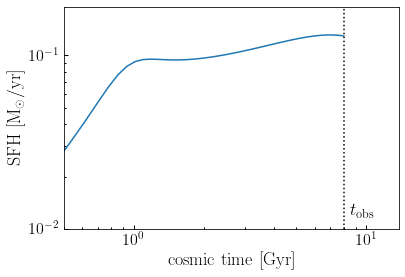

In [5]:
t_table, dmhdt_table, log_mah_table, sfh_table, lgmet = galaxy_data

fig, ax = plt.subplots(1, 1)
__=ax.loglog()
xlim = ax.set_xlim(0.5, 13.8)
ylim = ax.set_ylim(0.01, 0.19)

__=ax.plot(t_table, sfh_table)
xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'${\rm SFH\ [M_{\odot}/yr]}$')
__=ax.plot(np.zeros(100)+t_obs, np.linspace(*ylim, 100), ':', color='k')

a, b = 8.5, 0.012
__=ax.annotate(r'$t_{\rm obs}$', xy=(a, b), xytext=(a, b), size=18)